# Collaborative filtering 

## Problem formulation 

<img src= 'problem_formulation1.png' width= '600' align='left'>
<img src= 'stars.png' width= '150' align='left'>

There are 3 typical approaches: 
- **Simple recommenders**: offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience
- **Content-based recommenders**: suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata
- **Collaborative filtering**: these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts

[source](https://www.datacamp.com/community/tutorials/recommender-systems-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-748597547652:dsa-473406569915&utm_loc_interest_ms=&utm_loc_physical_ms=1012865&gclid=Cj0KCQjwsZKJBhC0ARIsAJ96n3XK-0y5uKGhO4w7V-A3nvj7WZlIg9NVQ8aeCLYKiEqhcb44rtw9qDoaAmeLEALw_wcB)

# Content based recommendation systems 

It assumes you have set of features for each movie e.g. `romance` and `action`

<img src= 'content_based_1.png' width= '800' align='left'>

You may then infer values of corresponding features for users: 
<img src= 'content_based_2.png' width= '800' align='left'>

Finally using average for all computed features recommend movies with the most close vector of `(x_1, x_2)`

Note: Features may be automatically extracted from review text if available 

##  Collaborative filtering 

### Represent each user and each movie as vectors 

<img src= 'cofi_1.png' width= '800' align='left'>	

$X$ - movies 
$\Theta$ - users 

The $i$-th row of $X$ corresponds to the feature vector $x_i$ for the $i$-th movie, 

and the $j$-th column of $\Theta$ corresponds to one parameter vector $\theta_j$, for the $j$-th user. 

Both $x_i$ and $\theta_j$ are n-dimensional vectors. For the purposes of this exercise, you will use n = 100, and therefore <br>$x_i$ ∈ $R^{100}$ and $\theta_j$ ∈ $R^{100}$. 

$X.shape$ = $[n_m × 100]$ 
<br>$\Theta.shape$ = $[100×n_u ]$

$Y[i,j] = x_i\, @ \, \theta_j $

$Y= X\, @ \, \Theta$

$Y$.shape =  $[n_m, n_u]$

## Load movie ratings dataset

- The matrix `Y` (a num movies × num users matrix) stores the ratings `y(i,j)` (from 1 to 5) actually from 0 to 5 
- The matrix `R` is an binary-valued indicator matrix, where `R(i, j) = 1` if user `j` gave a rating to movie `i`, and `R(i, j) = 0` otherwise 
Note: `y[i,j]` is defined if `r[i,j] == 1`

In [1]:
from scipy.io import loadmat
import pandas as pd
mat= loadmat('ex8_movies.mat') # returns dict - just select proper key to get necessary data
print (mat.keys())
# returns dict! print (mat.keys()): ['__header__', '__version__', '__globals__', 'X', 'y']


dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])


In [2]:
def get_data():
    mat= loadmat('ex8_movies.mat') # returns dict - just select proper key to get necessary data
    Y= pd.DataFrame( mat['Y']) # value  vertical (axis 0):  movies 1682. Every row is for one movie , horizontal (axis 1): Users 943, every column is for one user  
    R= pd.DataFrame( mat['R']) #  flag of reviewed or not  vertical (axis 0):  movies 1682. Every row is for one movie , horizontal (axis 1): Users 943, every column is for one user  

    # convert to float to avoid issues with uint type  
    Y= Y.astype(float).values 
    R= R.astype(float).values

    return Y,R

Y,R= get_data()

print ('Y.shape=', Y.shape)
print ('Y[:5] =\n',Y[:5])
print ('\nUnique values of Y:\n',set(Y.ravel()))

Y.shape= (1682, 943)
Y[:5] =
 [[5. 4. 0. ... 5. 0. 0.]
 [3. 0. 0. ... 0. 0. 5.]
 [4. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]]

Unique values of Y:
 {0.0, 1.0, 2.0, 3.0, 4.0, 5.0}


In [3]:
print ('R.shape=', R.shape)
print ('R[:5] =\n',R[:5])
print ('\nUnique values of R:\n',set(R.ravel()))

R.shape= (1682, 943)
R[:5] =
 [[1. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]

Unique values of R:
 {0.0, 1.0}


## Collaborative Filtering Cost Function


$$ J =\frac{1}{2}\sum{((X @ \Theta-Y)*R)^2} + \frac{\lambda}{2}\sum{X^2} + \frac{\lambda}{2}\sum{\Theta^2}$$

In [4]:
def J (Y, R, X,Theta, lambd): 
    '''
    params: 1d vector  of X and Theta 
    :return expression for cost function 
    '''
    
    assert(X.shape[1]==Theta.shape[0])
    h= X @ Theta 


    try: 
        assert(h.shape ==Y.shape)
    except:
        print ('h.shape {} !=Y.shape {}'.format(h.shape, Y.shape) )

       
    J= 1/2 * np.sum(((h-Y)*R) **2) + lambd/2 * np.sum(X**2) + lambd/2 * np.sum(Theta**2)

    try: 
        assert(len(J.shape)== 0)
    except:
        print ('J is not raw number. J.shape = ', J.shape)
    
    return J

## Collaborative Filtering Cost Function Gradient
 


$$\frac{\partial J}{\partial X}=((X @ \Theta-Y)*R) @ \Theta^{T}+ \lambda X, \quad
\frac{\partial J}{\partial \theta}= \left( ((X @ \Theta-Y)*R)^{T} @ X \right)^{T} + \lambda  \Theta $$

In [5]:
def J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd): 
   
    cost_matr= (X @ Theta - Y) * R #  n_movies * n_users 

    X_grad= cost_matr @ Theta.T 
    Theta_grad= (cost_matr.T @ X).T
    
   
    try: 
        assert(X_grad.shape ==X.shape)
        assert(Theta_grad.shape ==Theta.shape)
    except:
        print ('Check gradient calculus')

    # Regularization part :          
    X_grad  += lambd * X
    Theta_grad += lambd * Theta

    
    return X_grad, Theta_grad

## Gradient descent (`fit`)

In [6]:
def fit(Y,R, num_features= 10,  alpha=0.0001, lambd= .01, eps= .1,  max_iter=1000,step=100, verbose=0):    
    num_movies,num_users =Y.shape
    
    
    if verbose: 
        print ('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))
        

    #     X= params[:num_movies*num_features].reshape(num_movies,num_features)
    #     Theta = params[num_movies*num_features:].reshape(num_features,num_users)

    np.random.seed(2019)
    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn( num_features, num_users)
    
    J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True # flag to continue next iter (grad desc step)
    iter_number =0 # used for limit by max_iter

    while continue_iter:            
        # Do step of gradient descent    
        X_grad, Theta_grad =  J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd)
        X= X- alpha  *X_grad        
        Theta= Theta- alpha  *Theta_grad

        # keep history of J values
        J_hist.append(J(Y, R, X,Theta, lambd))
        # check criteria of exit (finish grad desc)
        if iter_number> max_iter: # if limit succeeded
            continue_iter = False
            print ('iter_number> max_iter')
        elif np.abs(J_hist[iter_number-1] - J_hist[iter_number])< eps: # if accuracy is succeeded
            continue_iter = False
            print ('J_hist[iter_number]={}'.format(J_hist[iter_number]))
        iter_number += 1
        
        if verbose and iter_number%step ==0:
            print ('{}: {}'.format(iter_number, J_hist[iter_number-1]))
    
    return X,Theta, J_hist

In [7]:
import numpy as np

In [8]:
X,Theta, J_hist = fit(Y,R, alpha=0.001, lambd= 1,max_iter= 2000, verbose=1)

Running gradient descent with alpha= 0.001, lambda= 1, eps= 0.1, max_iter= 2000
100: 46624.80715776309
200: 53775.991502522505
300: 43733.534862063374
400: 40831.75291750633
500: 39035.82278190207
600: 37814.296316507156
700: 36925.665742625046
800: 36251.94119779427
900: 35726.607939683425
1000: 35309.36836244682
1100: 34973.2854281251
1200: 34698.789595353046
1300: 34471.40237327724
1400: 34280.73254673336
1500: 34119.55379496763
1600: 33982.716805256576
1700: 33866.18531536782
1800: 33766.476602993374
1900: 33680.49797333296
2000: 33605.57713377488
iter_number> max_iter


## Visualize cost function history 

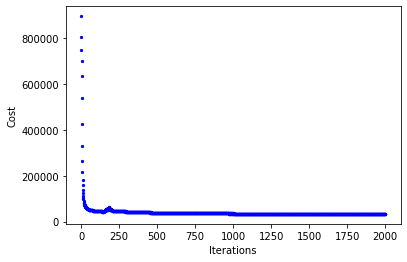

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
#     title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
#     # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
#     plt.title(title_str)


draw_cost_changes(J_hist)

## Predict missed values of training data 

In [10]:
pred = X@ Theta
pred

array([[3.63067147, 3.88666946, 2.40576999, ..., 4.54011846, 4.36029223,
        3.93326403],
       [2.80011248, 3.29577016, 2.53739175, ..., 3.17689721, 4.0113373 ,
        3.04035238],
       [3.06520486, 2.81648457, 3.93388444, ..., 2.72525932, 3.53337632,
        2.75231426],
       ...,
       [0.86845254, 0.72470642, 0.01049199, ..., 0.67518173, 0.55738831,
        0.8042484 ],
       [2.20769107, 2.10829064, 1.23490905, ..., 1.90791656, 2.12861293,
        1.78059828],
       [2.45855657, 2.27719474, 1.49320411, ..., 2.37037439, 1.95018702,
        1.16119517]])

## Evaluate the prediction

Evaluate on provided ratings 

In [11]:
diff_train = (pred-Y)*R
# avoid those valueswhere R = 0 
diff_train_proivided = diff_train.ravel()[np.where(diff_train.ravel()!=0)]
print ('Training:', np.abs(diff_train_proivided).max(), np.abs(diff_train_proivided).mean())

Training: 4.385953348630869 0.574793178988949


(array([2.0000e+01, 2.4900e+02, 8.5900e+02, 7.2740e+03, 3.6637e+04,
        4.0173e+04, 1.2578e+04, 1.9970e+03, 2.0700e+02, 6.0000e+00]),
 array([-4.38595335, -3.5459845 , -2.70601565, -1.86604681, -1.02607796,
        -0.18610911,  0.65385973,  1.49382858,  2.33379743,  3.17376628,
         4.01373512]),
 <a list of 10 Patch objects>)

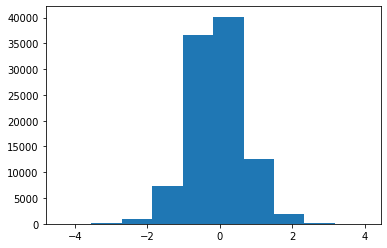

In [12]:
plt.hist(diff_train_proivided.ravel())

## Read movies names 

In [13]:
fn ='movie_ids.txt'

doc = []
with open(fn, 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        doc.append(' '.join(line.rstrip().split(' ')[1:]))
df_movie_names = pd.DataFrame(doc)

  
df_movie_names



,0
0,Toy Story (1995)
1,GoldenEye (1995)
2,Four Rooms (1995)
3,Get Shorty (1995)
4,Copycat (1995)
...,...
1677,Mat' i syn (1997)
1678,B. Monkey (1998)
1679,Sliding Doors (1998)
1680,You So Crazy (1994)


## Enter ratings for a new user

In [14]:
def build_my_raitings():
    my_ratings = np.zeros((1682, 1))
    # % Check the file movie_idx.txt for id of each movie in our dataset
    # % For example, Toy Story (1995) has ID 1, so to rate it "4", you can set

    my_ratings[0] = 4
    my_ratings[97] = 2
    my_ratings[6] = 3
    my_ratings[11]= 5
    my_ratings[53] = 4
    my_ratings[63]= 5
    my_ratings[65]= 3
    my_ratings[68] = 5
    my_ratings[182] = 4
    my_ratings[225] = 5
    my_ratings[354]= 5
    return my_ratings

my_ratings= ()

print ('\n\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {} for {}\n'.format(int(my_ratings[i][0]),df_movie_names.iloc[i].values[0]))




New user ratings:

Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4 for Alien (1979)

Rated 5 for Die Hard 2 (1990)

Rated 5 for Sphere (1998)



In [15]:
Y.shape

(1682, 943)

## Add new user ratings to the data matrix

Note: It requires retraining for all matrix in order to capture the vector for new user 

In [16]:
def add_my_ratings(Y,R,my_ratings):
    Y = np.c_[my_ratings,Y]
    R = np.c_[my_ratings !=0 , R]
    return Y, R 
        
# Y,R= get_data()    
my_ratings= build_my_raitings()
Y, R = add_my_ratings(Y,R,my_ratings)

In [17]:
Y.shape,  R.shape

((1682, 944), (1682, 944))

Running gradient descent with alpha= 0.001, lambda= 1, eps= 0.1, max_iter= 2000
100: 46963.90895989601
200: 51664.23939938371
300: 44027.19305533862
400: 40744.98439423744
500: 38679.486759550055
600: 37283.061197575946
700: 36295.87312367217
800: 35565.7670261875
900: 35005.89033485244
1000: 34565.85124060529
1100: 34215.5740850093
1200: 33935.29007784202
1300: 33710.36911611665
1400: 33529.12543256028
1500: 33382.10230717206
1600: 33261.80329805947
1700: 33162.4450192128
1800: 33079.657858780476
1900: 33010.16537213418
2000: 32951.48595587563
iter_number> max_iter


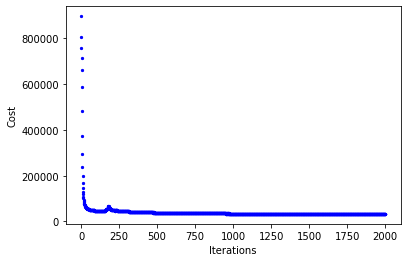

In [18]:
# Y,R= get_data()    
# my_ratings= build_my_raitings()
# Y, R = add_my_ratings(Y,R,my_ratings)
# Ymean, Ynorm = normalize_Y(Y,R, num_movies)

X,Theta, J_hist= fit(Y , R, alpha=0.001, lambd= 1,max_iter= 2000, eps= .1, step = 100, verbose=1)
draw_cost_changes(J_hist)

## Predict 

Recommend for new user 

In [19]:
pred= X @ Theta
my_pred = pred[:,0]
print(my_pred.shape)

top_pred= np.argsort(my_pred)[::-1]
print('\nTop recommendations for you:\n')
for i in range(100):
    j = top_pred[i]
    print('Predicting rating {:.2} for movie {} (# {})\n'.format(my_pred[j], df_movie_names.iloc[j],j))


(1682,)

Top recommendations for you:

Predicting rating 5.1 for movie 0    Terminator 2: Judgment Day (1991)
Name: 95, dtype: object (# 95)

Predicting rating 5.0 for movie 0    Raiders of the Lost Ark (1981)
Name: 173, dtype: object (# 173)

Predicting rating 5.0 for movie 0    Titanic (1997)
Name: 312, dtype: object (# 312)

Predicting rating 5.0 for movie 0    Terminator, The (1984)
Name: 194, dtype: object (# 194)

Predicting rating 4.9 for movie 0    Empire Strikes Back, The (1980)
Name: 171, dtype: object (# 171)

Predicting rating 4.8 for movie 0    Jurassic Park (1993)
Name: 81, dtype: object (# 81)

Predicting rating 4.8 for movie 0    Braveheart (1995)
Name: 21, dtype: object (# 21)

Predicting rating 4.8 for movie 0    Die Hard (1988)
Name: 143, dtype: object (# 143)

Predicting rating 4.7 for movie 0    Indiana Jones and the Last Crusade (1989)
Name: 209, dtype: object (# 209)

Predicting rating 4.7 for movie 0    Bean (1997)
Name: 337, dtype: object (# 337)

Predicting ra

# Sanity check on small dataset 

### Create train set 

In [20]:
Y= np.array([
    [5,5,1,1],
    [5,5,1,1],
    [1,1,5,5],
    [1,1,5,5]  
])
R = np.vectorize(lambda x: 1 if x>.5 else 0)(Y)
Y, R

(array([[5, 5, 1, 1],
        [5, 5, 1, 1],
        [1, 1, 5, 5],
        [1, 1, 5, 5]]),
 array([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]))

### Add new user (test)

In [21]:
my_ratings = np.zeros((4, 1))

my_ratings[0] = 5
my_ratings[2] = 1
my_ratings[3]= 1
print ('my_ratings\n', my_ratings)

my_ratings
 [[5.]
 [0.]
 [1.]
 [1.]]


### Concat train and test sets 

In [22]:
print('add my ratings')
Y, R = add_my_ratings(Y,R,my_ratings)

print (Y)

add my ratings
[[5. 5. 5. 1. 1.]
 [0. 5. 5. 1. 1.]
 [1. 1. 1. 5. 5.]
 [1. 1. 1. 5. 5.]]


### Train model

Running gradient descent with alpha= 0.01, lambda= 0.1, eps= 0.001, max_iter= 2000
100: 4.25667042506693
200: 3.8388543308534704
300: 3.5073969292065867
400: 3.2449290957652606
500: 3.037307357530345
600: 2.8730966005347396
700: 2.7431287336345984
J_hist[iter_number]=2.6754817708271137


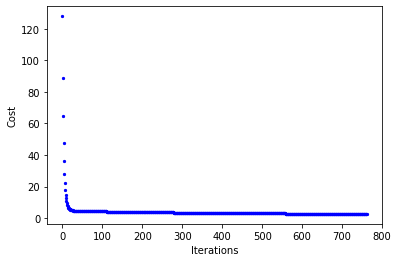

In [23]:
X,Theta, J_hist= fit(Y , R, alpha=0.01, lambd= 0.1,max_iter= 2000, eps= .001, verbose=1)

draw_cost_changes(J_hist)



### Predict

In [24]:
pred= X@ Theta
my_pred = pred[:,0] 
pred # first columns corresponds to my ratings 

array([[4.93179693, 4.96373946, 4.97294368, 1.00741187, 0.99524511],
       [3.74693647, 4.95299586, 4.93823194, 0.99363625, 1.00724028],
       [0.99265197, 0.99964485, 1.00227309, 4.95586195, 4.94939855],
       [1.00267868, 0.99985048, 0.99699061, 4.95009559, 4.94792911]])

In [25]:
for i in range(4):
    print('Predicting rating {:.2} , provided: {}'.format(my_pred[i], my_ratings[i,0]))

Predicting rating 4.9 , provided: 5.0
Predicting rating 3.7 , provided: 0.0
Predicting rating 0.99 , provided: 1.0
Predicting rating 1.0 , provided: 1.0


#### Looks good 

# Run on another dataset 

### Get the data 

In [26]:
# https://www.librec.net/datasets.html
df_filmtrust = pd.read_csv ('ratings.txt',sep= ' ',names= ['uid', 'iid', 'rating'])
print (len(df_filmtrust))
df_filmtrust

35497


,uid,iid,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


### Import algorithm 

In [27]:
import os, sys
import json
# cwd= os.getcwd()
# path_to_common_dir = os.path.dirname(os.path.dirname(cwd))
# sys.path.append(path_to_common_dir)

from collaborative_filtering import fit_collaborative_filtering


### Convert input data to matrix

In [28]:
import numpy as np 
def convert_to_matrix(df, values, index, columns):
    '''
        e.g. values='average_msv', index='phrase', columns='locode' 
    '''
    df_target=df.pivot_table(values=values, index=index, columns=columns, aggfunc=np.max, dropna= False)
    return df_target


df_target = convert_to_matrix(df_filmtrust, values='rating', index='iid', columns='uid')
df_target


uid,1,2,3,4,5,6,7,8,9,10,...,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508
iid,,,,,,,,,,,,,,,,,,,,,
1,2.0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,...,2.5,NaN,2.0,3.0,NaN,3.0,4.0,NaN,NaN,1.5
2,4.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,2.5,NaN,3.5,3.0,3.5,NaN,3.0,NaN,4.0,3.0
3,3.5,NaN,NaN,2.5,NaN,NaN,0.5,NaN,NaN,NaN,...,2.0,NaN,2.0,2.5,NaN,NaN,2.0,NaN,NaN,2.0
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,1.5,4.0,NaN,NaN,3.0,1.5,NaN,4.0
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,2.5,3.0,3.5,NaN,4.0,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preparee `Y` and `R` 

In [29]:
Y= df_target.fillna(0) 
R= df_target.applymap(lambda x: 0 if np.isnan(x) else 1)

scale = Y.max() - Y.min()
Y_scaled = Y / scale * 10
Y_scaled

uid,1,2,3,4,5,6,7,8,9,10,...,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508
iid,,,,,,,,,,,,,,,,,,,,,
1,5.00,0.0,0.0,10.000000,0.0,0.0,2.50,0.0,0.0,0.0,...,6.25,0.0,5.00,7.50,0.00,7.5,10.0,0.0,0.0,3.75
2,10.00,0.0,0.0,0.000000,0.0,10.0,10.00,0.0,0.0,0.0,...,6.25,0.0,8.75,7.50,8.75,0.0,7.5,0.0,10.0,7.50
3,8.75,0.0,0.0,8.333333,0.0,0.0,1.25,0.0,0.0,0.0,...,5.00,0.0,5.00,6.25,0.00,0.0,5.0,0.0,0.0,5.00
4,7.50,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,...,10.00,0.0,3.75,10.00,0.00,0.0,7.5,7.5,0.0,10.00
5,10.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,...,10.00,0.0,6.25,7.50,8.75,0.0,10.0,0.0,0.0,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
2068,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
2069,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00


### Train model 

In [30]:
X, Theta, J_hist = fit(Y_scaled.values, R.values, num_features=20, alpha=0.0005, lambd=1, max_iter=2000,
                           eps=.01, step=50, verbose=1)

Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 128948.51193566457
100: 92677.41943140065
150: 83737.10569497064
200: 79313.0170171902
250: 75886.5181054718
300: 72734.96813864725
350: 69702.55636604514
400: 66763.59280532016
450: 63919.99544469977
500: 61182.06576094328
550: 58565.72409585066
600: 56089.04536968253
650: 53767.452661064664
700: 51610.20826463733
750: 49619.467151913195
800: 47791.43501760042
850: 46118.39278049728
900: 44590.518947878416
950: 43197.07614329247
1000: 41927.045967718754
1050: 40769.46313787921
1100: 39713.637140733255
1150: 38749.34017721745
1200: 37866.9703510746
1250: 37057.67591386896
1300: 36313.42963281166
1350: 35627.05299975451
1400: 34992.19825681698
1450: 34403.299808364274
1500: 33855.50666798059
1550: 33344.60582790518
1600: 32866.94400630032
1650: 32419.352780865356
1700: 31999.080008160086
1750: 31603.728824479855
1800: 31231.20445268488
1850: 30879.668422740448
1900: 30547.499523829294
1950: 30233.26071

### Visualize cost history

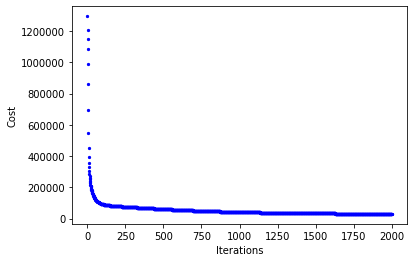

In [31]:
draw_cost_changes(J_hist)

### Predict 

In [32]:
pred = X @ Theta
pred_rescaled = pred * scale.values / 10
pred_rescaled


array([[ 2.34829389e+00,  1.33236971e+00,  1.88945966e+00, ...,
         1.33370945e+00,  3.62056014e+00,  1.91175985e+00],
       [ 4.14162003e+00,  1.57542166e+00, -7.84242806e-01, ...,
         1.22517513e+00,  3.95863354e+00,  2.49047667e+00],
       [ 3.39416077e+00,  1.18555474e+00,  2.80480638e+00, ...,
         1.18817245e+00,  3.04499990e+00,  2.62556217e+00],
       ...,
       [ 3.48451165e-01, -1.64544200e-01, -8.18396059e-02, ...,
         2.81615346e-01,  2.49455071e-04,  1.03177490e-01],
       [ 1.22211978e-02, -2.87651280e-01, -2.54979752e-01, ...,
         2.68650905e-01,  2.48641514e-01,  2.28347102e-01],
       [ 1.34158693e-01,  1.74017974e-02,  2.93316364e+00, ...,
        -2.14726177e-01, -1.75257866e-01,  7.96187324e-01]])

### Convert back from pivot to sparse format 

In [33]:
df_results_pivot= pd.DataFrame(pred_rescaled , index= Y.index, columns = Y.columns)
df_results_pivot_temp= pd.DataFrame(df_results_pivot.to_records())
df_results = pd.melt(df_results_pivot_temp, 
            id_vars='iid', 
            value_vars=list(df_results_pivot_temp.columns[1:]), 
            var_name='uid', 
            value_name='rating_pred')
df_results

,iid,uid,rating_pred
0,1,1,2.348294
1,2,1,4.141620
2,3,1,3.394161
3,4,1,3.227109
4,5,1,3.952659
...,...,...,...
3123063,2067,1508,1.065837
3123064,2068,1508,0.659599
3123065,2069,1508,0.103177
3123066,2070,1508,0.228347


### Round to existing values 

In [34]:
existing_unique_values = np.array(sorted(df_filmtrust['rating'].unique()))
def round_to_existing(val):
    return existing_unique_values[np.argmin(np.abs(existing_unique_values-val))]

df_results['rating_round']= df_results['rating_pred'].apply(round_to_existing)
df_results

,iid,uid,rating_pred,rating_round
0,1,1,2.348294,2.5
1,2,1,4.141620,4.0
2,3,1,3.394161,3.5
3,4,1,3.227109,3.0
4,5,1,3.952659,4.0
...,...,...,...,...
3123063,2067,1508,1.065837,1.0
3123064,2068,1508,0.659599,0.5
3123065,2069,1508,0.103177,0.5
3123066,2070,1508,0.228347,0.5


In [35]:
df_results['uid']= df_results['uid'].astype(int)
df_eval= df_filmtrust.merge(df_results, on=['uid','iid'])
df_eval

,uid,iid,rating,rating_pred,rating_round
0,1,1,2.0,2.348294,2.5
1,1,2,4.0,4.141620,4.0
2,1,3,3.5,3.394161,3.5
3,1,4,3.0,3.227109,3.0
4,1,5,4.0,3.952659,4.0
...,...,...,...,...,...
35492,1508,84,3.5,3.265180,3.5
35493,1508,17,4.0,3.605453,3.5
35494,1508,669,1.0,0.976222,1.0
35495,1508,686,2.5,2.217285,2.0


0.8486452922015185
mean error = 0.24867924584983903, max error = 2.9077204068186235


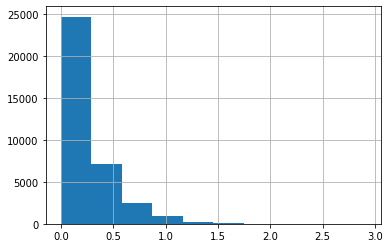

In [36]:
from sklearn.metrics import r2_score
print (r2_score(df_eval['rating'], df_eval['rating_pred']))

df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']
df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

0.8380090898355681
mean error = 0.20331295602445276, max error = 2.5


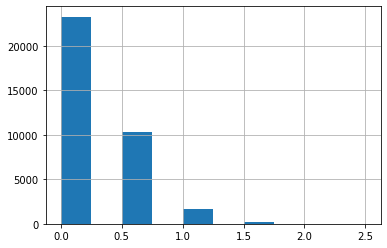

In [37]:
print (r2_score(df_eval['rating'], df_eval['rating_round'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_round']
df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

## Evaluate cofi on test set 

In [38]:
from sklearn.model_selection import train_test_split 
df_train, df_test= train_test_split (df_filmtrust, test_size = 1000)
df_train.shape,df_test.shape

((34497, 3), (1000, 3))

Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 126016.64742981247
100: 90413.48002205367
150: 81984.0073044723
200: 77836.695654275
250: 74577.4260858823
300: 71506.32120139048
350: 68487.0442426321
400: 65541.73754357747
450: 62720.71482353737
500: 60056.53765146234
550: 57560.44616600142
600: 55231.00112321471
650: 53060.697846121155
700: 51039.60608621389
750: 49157.616923604815
800: 47405.79887560301
850: 45776.89556162448
900: 44265.12064277012
950: 42865.545752800586
1000: 41573.389455053046
1050: 40383.45178618436
1100: 39289.83475957642
1150: 38285.961971037425
1200: 37364.80574527783
1250: 36519.19264475635
1300: 35742.08529282637
1350: 35026.791222703156
1400: 34367.09232188048
1450: 33757.30945238681
1500: 33192.32117275991
1550: 32667.55237493791
1600: 32178.9442181076
1650: 31722.913291353012
1700: 31296.30562066406
1750: 30896.34950546123
1800: 30520.609885024005
1850: 30166.94587951173
1900: 29833.47232657909
1950: 29518.52555763386

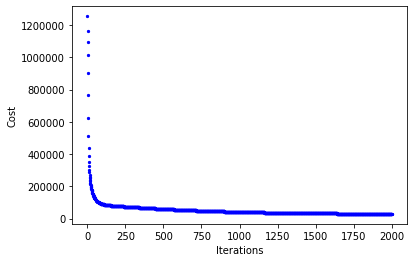

In [39]:
df_target = convert_to_matrix(df_train, values='rating', index='iid', columns='uid')

Y= df_target.fillna(0) 
R= df_target.applymap(lambda x: 0 if np.isnan(x) else 1)

scale = Y.max() - Y.min()
Y_scaled = Y / scale * 10

X, Theta, J_hist = fit(Y_scaled.values, R.values, num_features=20, alpha=0.0005, lambd=1, max_iter=2000,
                           eps=.01, step=50, verbose=1)
draw_cost_changes(J_hist)

In [40]:
pred = X @ Theta
pred_rescaled = pred * scale.values / 10
pred_rescaled

df_results_pivot= pd.DataFrame(pred_rescaled , index= Y.index, columns = Y.columns)
df_results_pivot_temp= pd.DataFrame(df_results_pivot.to_records())
df_results = pd.melt(df_results_pivot_temp, 
            id_vars='iid', 
            value_vars=list(df_results_pivot_temp.columns[1:]), 
            var_name='uid', 
            value_name='rating_pred')
df_results

,iid,uid,rating_pred
0,1,1,2.418693
1,2,1,3.934631
2,3,1,3.510129
3,4,1,3.398282
4,5,1,3.655706
...,...,...,...
3080995,2067,1508,-0.244489
3080996,2068,1508,-0.075501
3080997,2069,1508,1.031525
3080998,2070,1508,-0.507552


### Evaluate on train set 

In [41]:
df_results['uid']= df_results['uid'].astype(int)
df_eval= df_train.merge(df_results, on=['uid','iid'])


r2_score= 0.849887346932582
mean error = 0.24685865719279082, max error = 2.651642687114893


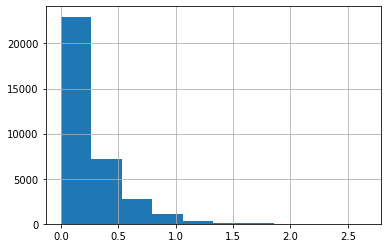

In [42]:
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

### Evaluate on test set 

In [44]:

df_results['uid']= df_results['uid'].astype(int)
df_eval= df_test.merge(df_results, on=['uid','iid'])
df_eval 

,uid,iid,rating,rating_pred
0,199,638,1.0,3.118132
1,222,8,3.5,2.853455
2,86,8,4.0,4.096544
3,740,5,4.0,3.583099
4,265,249,3.0,3.236602
...,...,...,...,...
970,1104,635,3.5,1.630582
971,835,7,4.0,4.012630
972,461,215,2.5,2.252509
973,323,733,3.5,1.703528


r2_score= -0.6415996100477313
mean error = 0.8670664034028939, max error = 6.159568658311975


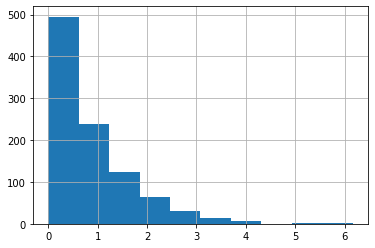

In [45]:
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

In [46]:
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )


r2_score= -0.6415996100477313


r2_score= -0.45111336492030096
mean error = 0.8, max error = 3.5


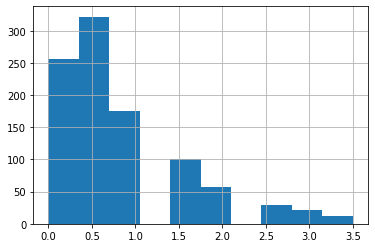

In [47]:
df_results['rating_round']= df_results['rating_pred'].apply(round_to_existing)
df_eval= df_test.merge(df_results, on=['uid','iid'])
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_round'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_round']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

---

The collaborative algorithm is leveraged for predicting Monthly Search Volume of certain phrase in certain location 

<img src= 'msv_cofi2.png' width= '800' align='left'>


# Compare with other  implementations: surprise



`pip install surprise`

[source](https://cambridgespark.com/practical-introduction-to-recommender-systems/)

## Main scenario of using model 

### Fitting the Model

In [49]:
df= df_filmtrust.copy()
lower_rating = df['rating'].min()
upper_rating = df['rating'].max()
lower_rating, upper_rating

(0.5, 4.0)

So our review range goes from 0.5 to 4, which is a little non-standard (the default for surprise is 1-5). So we will need to change this when we load in our dataset, which is done like this:

In [50]:
import surprise
reader= surprise.Reader(rating_scale= (lower_rating, upper_rating))
data = surprise.Dataset.load_from_df(df,reader)
data 

In [51]:
data.build_full_trainset()

In [52]:
alg=surprise.SVDpp()
output = alg.fit(data.build_full_trainset())

In [53]:
help(surprise.SVDpp)

Help on class SVDpp in module surprise.prediction_algorithms.matrix_factorization:

class SVDpp(surprise.prediction_algorithms.algo_base.AlgoBase)
 |  SVDpp(n_factors=20, n_epochs=20, init_mean=0, init_std_dev=0.1, lr_all=0.007, reg_all=0.02, lr_bu=None, lr_bi=None, lr_pu=None, lr_qi=None, lr_yj=None, reg_bu=None, reg_bi=None, reg_pu=None, reg_qi=None, reg_yj=None, random_state=None, verbose=False)
 |  
 |  The *SVD++* algorithm, an extension of :class:`SVD` taking into account
 |  implicit ratings.
 |  
 |  The prediction :math:`\hat{r}_{ui}` is set as:
 |  
 |  .. math::
 |      \hat{r}_{ui} = \mu + b_u + b_i + q_i^T\left(p_u +
 |      |I_u|^{-\frac{1}{2}} \sum_{j \in I_u}y_j\right)
 |  
 |  Where the :math:`y_j` terms are a new set of item factors that capture
 |  implicit ratings. Here, an implicit rating describes the fact that a user
 |  :math:`u` rated an item :math:`j`, regardless of the rating value.
 |  
 |  If user :math:`u` is unknown, then the bias :math:`b_u` and the fact

In [54]:
pred= alg.predict(uid= '50', iid= '52')
pred, pred.est

(Prediction(uid='50', iid='52', r_ui=None, est=3.0028030537791928, details={'was_impossible': False}),
 3.0028030537791928)

## Making Recommendations

In [55]:
iids= df['iid'].unique()
iids

array([   1,    2,    3, ..., 2069, 2070, 2071])

In [56]:
# user provided feedback
target_uid= 50
iids_of_target_user=df.loc[df['uid']==target_uid,'iid']
iids_of_target_user

864      8
865    211
866      3
867      2
868    219
869    234
870     12
871    254
872    250
873    207
874     11
875    253
876    236
877     84
878     10
879      7
880    233
881     13
882      1
883      5
884      6
885    252
886    241
887    216
888    257
889    206
890      4
891    217
892      9
893    215
894    213
895     17
896    255
897    220
898    121
899    245
900    239
901    251
902    235
Name: iid, dtype: int64

In [57]:
# get remainings 
iids_to_predict= np.setdiff1d(iids,iids_of_target_user)
iids_to_predict

array([  14,   15,   16, ..., 2069, 2070, 2071])

Next we want to predict the score of each of the movie ids that user 50 didn’t rate, and find the best one. For this we have to create another dataset with the iids we want to predict in the sparse format as before of: uid, iid, rating. We’ll just arbitrarily set all the ratings of this test set to `4`, as they are not needed. Let’s do this, then output the first prediction.

In [58]:
test_set = [[target_uid,iid,4.] for iid in iids_to_predict]
test_set

[[50, 14, 4.0],
 [50, 15, 4.0],
 [50, 16, 4.0],
 [50, 18, 4.0],
 [50, 19, 4.0],
 [50, 20, 4.0],
 [50, 21, 4.0],
 [50, 22, 4.0],
 [50, 23, 4.0],
 [50, 24, 4.0],
 [50, 25, 4.0],
 [50, 26, 4.0],
 [50, 27, 4.0],
 [50, 28, 4.0],
 [50, 29, 4.0],
 [50, 30, 4.0],
 [50, 31, 4.0],
 [50, 32, 4.0],
 [50, 33, 4.0],
 [50, 34, 4.0],
 [50, 35, 4.0],
 [50, 36, 4.0],
 [50, 37, 4.0],
 [50, 38, 4.0],
 [50, 39, 4.0],
 [50, 40, 4.0],
 [50, 41, 4.0],
 [50, 42, 4.0],
 [50, 43, 4.0],
 [50, 44, 4.0],
 [50, 45, 4.0],
 [50, 46, 4.0],
 [50, 47, 4.0],
 [50, 48, 4.0],
 [50, 49, 4.0],
 [50, 50, 4.0],
 [50, 51, 4.0],
 [50, 52, 4.0],
 [50, 53, 4.0],
 [50, 54, 4.0],
 [50, 55, 4.0],
 [50, 56, 4.0],
 [50, 57, 4.0],
 [50, 58, 4.0],
 [50, 59, 4.0],
 [50, 60, 4.0],
 [50, 61, 4.0],
 [50, 62, 4.0],
 [50, 63, 4.0],
 [50, 64, 4.0],
 [50, 65, 4.0],
 [50, 66, 4.0],
 [50, 67, 4.0],
 [50, 68, 4.0],
 [50, 69, 4.0],
 [50, 70, 4.0],
 [50, 71, 4.0],
 [50, 72, 4.0],
 [50, 73, 4.0],
 [50, 74, 4.0],
 [50, 75, 4.0],
 [50, 76, 4.0],
 [50, 77

## All predictions of test set  for `uid` =  50 

In [59]:
test_pred = alg.test(test_set)
test_pred[:4]

[Prediction(uid=50, iid=14, r_ui=4.0, est=3.158730402912402, details={'was_impossible': False}),
 Prediction(uid=50, iid=15, r_ui=4.0, est=3.2522939624012572, details={'was_impossible': False}),
 Prediction(uid=50, iid=16, r_ui=4.0, est=3.6900264708954094, details={'was_impossible': False}),
 Prediction(uid=50, iid=18, r_ui=4.0, est=3.6789391678014987, details={'was_impossible': False})]

## Sort by rating

In [60]:
pred_raitings = np.array([pred.est for pred in test_pred ])
pred_raitings


array([3.1587304 , 3.25229396, 3.69002647, ..., 3.42235394, 3.46692471,
       3.48543971])

In [61]:
top_idx= pred_raitings.argsort()[::-1]
top_idx

array([ 765, 1051,  210, ...,  413,  694,  552])

In [62]:
print ('Recommendation for user uid= {}:\n'.format(target_uid))
for i in range (100):
    idx = top_idx[i]
    iid = iids_to_predict[idx]
    raiting= pred_raitings[idx] 
    print ('Rating {} for item iid= {}'.format(raiting, iid) )
    

Recommendation for user uid= 50:

Rating 4.0 for item iid= 805
Rating 4.0 for item iid= 1091
Rating 4.0 for item iid= 242
Rating 4.0 for item iid= 545
Rating 4.0 for item iid= 286
Rating 4.0 for item iid= 689
Rating 4.0 for item iid= 696
Rating 4.0 for item iid= 432
Rating 4.0 for item iid= 728
Rating 4.0 for item iid= 299
Rating 4.0 for item iid= 307
Rating 4.0 for item iid= 657
Rating 4.0 for item iid= 363
Rating 4.0 for item iid= 1118
Rating 4.0 for item iid= 400
Rating 4.0 for item iid= 68
Rating 4.0 for item iid= 484
Rating 4.0 for item iid= 705
Rating 4.0 for item iid= 335
Rating 4.0 for item iid= 675
Rating 4.0 for item iid= 96
Rating 4.0 for item iid= 318
Rating 3.999220152458527 for item iid= 425
Rating 3.9902708811506273 for item iid= 834
Rating 3.98813308688595 for item iid= 842
Rating 3.9851634141743424 for item iid= 218
Rating 3.985102395200728 for item iid= 189
Rating 3.9844658729547024 for item iid= 704
Rating 3.9814212991897002 for item iid= 658
Rating 3.974542910604697

## Evaluate surprise model on train set  

r2_score= 0.49889069453761237
mean error = 0.50031570045977, max error = 2.90214265953699


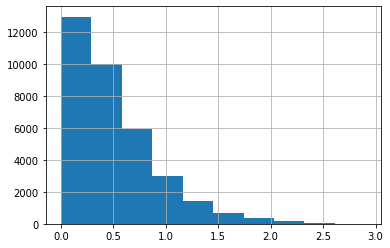

In [63]:
df= df_train.copy()
lower_rating = df['rating'].min()
upper_rating = df['rating'].max()

reader= surprise.Reader(rating_scale= (lower_rating, upper_rating))
data = surprise.Dataset.load_from_df(df,reader)

alg=surprise.SVDpp()
alg.fit(data.build_full_trainset())
test_pred = alg.test(df_train.values)

df_test_pred = pd.DataFrame([(pred.uid, pred.iid, pred.est)  for pred in test_pred ])
df_test_pred.columns = ['uid','iid', 'rating_pred']

df_eval= df_train.merge(df_test_pred, on=['uid','iid'])

print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

In [64]:
print ('check3')

check3


## Evaluate surprise model on test set  

In [65]:
df= df_train.copy()
lower_rating = df['rating'].min()
upper_rating = df['rating'].max()
lower_rating, upper_rating

(0.5, 4.0)

In [66]:
reader= surprise.Reader(rating_scale= (lower_rating, upper_rating))
data = surprise.Dataset.load_from_df(df,reader)
data 

In [67]:
alg=surprise.SVDpp()
alg.fit(data.build_full_trainset())

In [68]:
test_pred = alg.test(df_test.values)
test_pred

[Prediction(uid=199.0, iid=638.0, r_ui=1.0, est=2.639622236590209, details={'was_impossible': False}),
 Prediction(uid=222.0, iid=8.0, r_ui=3.5, est=3.3571548800782223, details={'was_impossible': False}),
 Prediction(uid=86.0, iid=8.0, r_ui=4.0, est=3.905444303444832, details={'was_impossible': False}),
 Prediction(uid=740.0, iid=5.0, r_ui=4.0, est=3.8106104016450257, details={'was_impossible': False}),
 Prediction(uid=265.0, iid=249.0, r_ui=3.0, est=3.140240490558803, details={'was_impossible': False}),
 Prediction(uid=1126.0, iid=11.0, r_ui=4.0, est=3.8307937938684447, details={'was_impossible': False}),
 Prediction(uid=1108.0, iid=216.0, r_ui=1.0, est=2.4883397173415265, details={'was_impossible': False}),
 Prediction(uid=464.0, iid=9.0, r_ui=4.0, est=3.4878746960554827, details={'was_impossible': False}),
 Prediction(uid=313.0, iid=216.0, r_ui=4.0, est=2.958001492847818, details={'was_impossible': False}),
 Prediction(uid=677.0, iid=217.0, r_ui=4.0, est=3.2449203623812095, details=

In [69]:
df_test_pred = pd.DataFrame([(pred.uid, pred.iid, pred.est)  for pred in test_pred ])
df_test_pred.columns = ['uid','iid', 'rating_pred']

df_test_pred

,uid,iid,rating_pred
0,199.0,638.0,2.639622
1,222.0,8.0,3.357155
2,86.0,8.0,3.905444
3,740.0,5.0,3.810610
4,265.0,249.0,3.140240
...,...,...,...
995,1104.0,635.0,3.145829
996,835.0,7.0,3.727006
997,461.0,215.0,2.723087
998,323.0,733.0,2.492759


In [70]:
df_eval= df_test.merge(df_test_pred, on=['uid','iid'])
df_eval 

,uid,iid,rating,rating_pred
0,199,638,1.0,2.639622
1,222,8,3.5,3.357155
2,86,8,4.0,3.905444
3,740,5,4.0,3.810610
4,265,249,3.0,3.140240
...,...,...,...,...
995,1104,635,3.5,3.145829
996,835,7,4.0,3.727006
997,461,215,2.5,2.723087
998,323,733,3.5,2.492759


r2_score= 0.2703624797007942
mean error = 0.6147921392692635, max error = 3.225807170673469


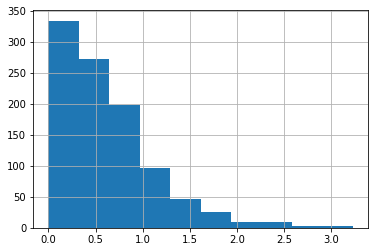

In [71]:
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

In [72]:
print ('check4')

check4


# Using fastai



## EmbeddingDotBias Model
FastAI provides **two different types** of collab models. 
- A simple model called EmbeddingDotBias which used for almost all recommendation systems a few years ago. It creates embeddings for both users and books and then takes the dot product of them. 
- The second is a neural network based model which uses embeddings and fully-connected layers.

An embedding is a mapping from discrete objects, such as words or ids of books and users in our case, to a vector of continuous values. This can be used to find similarities between the discrete objects, that wouldn’t be apparent to the model if it didn’t use embedding layers.
These embedding vectors are low-dimensional and get updated whilst training the network.

Both models can be created using the collab_learner class. Standardly the **use_nn** argument is set to false and therefore we are creating an **EmbeddingDotBias** model.

As further arguments, we can pass the collab learner the **n_factors** argument which represents the size of the embedding vectors as well as the **yrange** argument which specifies the range of the rating values we found earlier.

# Implementation on colab 

Here is the code to run: FastAi: [Collaborative filtering](https://colab.research.google.com/drive/1NNwPzIbnL24Fr9pAjy5vXdP_43LJEXb3?usp=sharing)


Here is more information: [Collaborative filtering with FastAI](https://towardsdatascience.com/collaborative-filtering-with-fastai-3dbdd4ef4f00)

# Home task 

Find the public dataset and apply collaborative filtering recommendation


[Beginner Tutorial: Recommender Systems in Python](https://www.datacamp.com/community/tutorials/recommender-systems-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-748597547652:dsa-473406569915&utm_loc_interest_ms=&utm_loc_physical_ms=1012865&gclid=Cj0KCQjwsZKJBhC0ARIsAJ96n3XK-0y5uKGhO4w7V-A3nvj7WZlIg9NVQ8aeCLYKiEqhcb44rtw9qDoaAmeLEALw_wcB)